# logistic model

In [1]:
# importieren (Pandas, Matplotlib, Scikit-Learn)
import pandas as pd, matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


In [ ]:
# Daten einlesen
df = pd.read_csv("creditcard.csv", converters={"CreditCard": lambda x: 1 if x=="Yes" else 0})

# Scatterplot
plt.scatter(df["Age"], df["CreditCard"])
plt.xlabel("Alter")
plt.ylabel("Kreditkarte (0/1)")


In [ ]:
# Modell finden/ Parameter finden

m = LogisticRegression(C=1e9, solver="lbfgs").fit(df[["Age"]], df["CreditCard"]) # c=1e9 C istRegularisierung -> hier keine R. da 1e9 sehr hoch
print(m.intercept_[0], m.coef_[0,0])

# c=1e9 C istRegularisierung -> hier keine R. da 1e9 sehr hoch
#"lbfgs" Optimierungsverfahren, das Maximum-Likelihood-Schätzungen berechnet.

In [ ]:
#Log funktion darstellen mit geglätteter kurve

plt.scatter(df["Age"], df["CreditCard"])
s = df[["Age"]].sort_values("Age")           # hier x-wert verwenden (s= age_sorted nach Grösse für eine glatte Linie)
plt.plot(s["Age"], m.predict_proba(s)[:,1], color="red") # [:,1] y =1 -> so stehen lassen, solange wir nur 2 Klassen modellieren



In [ ]:
# spez. π /Prob berechnen
m.predict_proba(pd.DataFrame({"Age":[80]}))[:,1]

In [ ]:
# Klassifikationsmatrik /confusion matrix

yhat = (m.predict_proba(df[["Age"]])[:,1] >= 0.5).astype(int)
ConfusionMatrixDisplay.from_predictions(df["CreditCard"], yhat, display_labels=[0, 1])

In [ ]:
# Accuracy/ Prozentsatz korrekt klassifizierter Beobachtungen
yhat = (m.predict_proba(df[["Age"]])[:,1] >= 0.5).astype(int)
confusion_matrix(df["CreditCard"], yhat)

---
# linear model

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


In [3]:
df = pd.read_csv('autos-1647012077(1).csv')

In [ ]:

# Scatterplot/ Variabeln im Verhältnis
plt.scatter(df['geschwindigkeit'], df['distanz'])

In [4]:
# Fitting Model für lineare Regression


m = LinearRegression().fit(df[['geschwindigkeit']], df['distanz']) # fit berechnet optimal weights b0, b1 -> fits the model
print(m.intercept_, m.coef_[0])

-22.91255308461573 4.2695556874743135


In [ ]:
# Regressionsgerade und Daten zusammen

plt.scatter(df['geschwindigkeit'], df['distanz'])
plt.plot(df['geschwindigkeit'], m.predict(df[['geschwindigkeit']]), color='red')

In [5]:
# Qualität des Models
# R^2

m.score(df[['geschwindigkeit']], df['distanz'])

0.8243250457863955

In [9]:
# resudien berechnen und plotten

#

yhat = m.predict(df[['geschwindigkeit']])
resid = df['distanz'] - yhat

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3740366888.py, line 7)

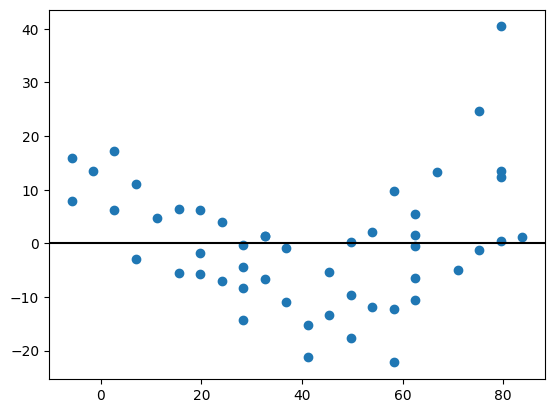

In [7]:
 # Tukey-Anscombe-Diagramm

plt.scatter(yhat, resid)
plt.axhline(0, color='black')
 # Tukey-Anscombe-Diagramm

In [ ]:

plt.scatter(df['geschwindigkeit'], resid)
plt.axhline(0, color='black')


In [ ]:


plt.hist(resid)
plt.show()

In [ ]:
yhat = m.predict(df[['geschwindigkeit']])
resid = df['distanz'] - yhat
plt.hist(resid)
plt.show()

 Residuentest händisch, Ziel: Modellannahmen prüfen
1. Tukey-Anscombe-Diagramm
    Punktewolke, gleichbreites Band ohne Muster-> Modell verwendbar, liefert zuverlässige Werte
    Muster / Trend / Trichter → Modell verletzt Annahmen
        - Trichterfomr → Varianz nicht konstant → Zielvariable transformieren (z. B. log y)
        - Krümmung → Beziehung nicht linear → Prädiktor transformieren (z. B. x², log x)


2. Histo Residuen
 - Normal -> gut, t-/F-test und p_werte zulässig
 - nicht -> t-/F-test und p_werte nicht zulässig
        - Mehr Daten prüfen / Ausreisser prüfen
        - Transformation der Zielvariable (log(y), √y)


